In [28]:

import xarray as xr
import pandas as pd
import numpy as np


ds_sat = xr.open_dataset('LGMR_data/LGMR_SAT_climo.nc')
# ds_sat.info()

# lats = ds_sat["lat"].values
# lons = ds_sat["lon"].values

# lats = np.array(ds_sat["lat"].values, dtype=np.float64)
# lons = np.array(ds_sat["lon"].values, dtype=np.float64)

df_pre = pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\pre.csv")

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [54]:
df_pre

,age,pre
0,100.0,0.016431
1,300.0,0.016690
2,500.0,0.016891
3,700.0,0.017029
4,900.0,0.017104
...,...,...
115,23100.0,0.018083
116,23300.0,0.017836
117,23500.0,0.017535
118,23700.0,0.017182


In [40]:
ds_sat['age'].values

array([  100.,   300.,   500.,   700.,   900.,  1100.,  1300.,  1500.,
        1700.,  1900.,  2100.,  2300.,  2500.,  2700.,  2900.,  3100.,
        3300.,  3500.,  3700.,  3900.,  4100.,  4300.,  4500.,  4700.,
        4900.,  5100.,  5300.,  5500.,  5700.,  5900.,  6100.,  6300.,
        6500.,  6700.,  6900.,  7100.,  7300.,  7500.,  7700.,  7900.,
        8100.,  8300.,  8500.,  8700.,  8900.,  9100.,  9300.,  9500.,
        9700.,  9900., 10100., 10300., 10500., 10700., 10900., 11100.,
       11300., 11500., 11700., 11900., 12100., 12300., 12500., 12700.,
       12900., 13100., 13300., 13500., 13700., 13900., 14100., 14300.,
       14500., 14700., 14900., 15100., 15300., 15500., 15700., 15900.,
       16100., 16300., 16500., 16700., 16900., 17100., 17300., 17500.,
       17700., 17900., 18100., 18300., 18500., 18700., 18900., 19100.,
       19300., 19500., 19700., 19900., 20100., 20300., 20500., 20700.,
       20900., 21100., 21300., 21500., 21700., 21900., 22100., 22300.,
      

In [47]:
ds_sat['sat'].values.shape   

(120, 96, 144)

In [50]:
ds_sat['sat'][:,20,30].values

array([ 4.559378  ,  4.3311296 ,  4.1237516 ,  4.099656  ,  4.0777454 ,
        4.063555  ,  4.04913   ,  4.2520733 ,  4.0234146 ,  4.02859   ,
        4.108581  ,  3.9510498 ,  3.874006  ,  3.8688447 ,  3.9348066 ,
        3.9714694 ,  3.9659488 ,  4.0357738 ,  4.0758643 ,  4.162604  ,
        4.172111  ,  4.239397  ,  4.2482347 ,  4.320736  ,  4.3904223 ,
        4.4425945 ,  4.4724674 ,  4.3676057 ,  4.414296  ,  4.5033507 ,
        4.4457    ,  4.3481364 ,  4.4373384 ,  4.479685  ,  4.4276824 ,
        4.4955773 ,  4.6170645 ,  4.7832975 ,  4.712187  ,  4.7344027 ,
        4.731967  ,  4.7708817 ,  4.764688  ,  4.6417494 ,  4.6173015 ,
        4.6537437 ,  4.5817127 ,  4.4398746 ,  4.2575407 ,  4.1911697 ,
        4.155902  ,  4.358775  ,  4.792205  ,  4.847909  ,  4.8923106 ,
        4.9120984 ,  4.8181686 ,  4.698402  ,  4.2702484 ,  4.0024123 ,
        4.121722  ,  3.8172634 ,  3.492168  ,  3.613958  ,  3.8230488 ,
        3.9292855 ,  3.8203773 ,  3.7679553 ,  3.9236038 ,  3.74

   LibSize       X:Y       Y:X
0     10.0  0.772115  0.502003
1     20.0  0.805923  0.731864
2     30.0  0.864826  0.837377
3     40.0  0.874667  0.848927
4     50.0  0.880713  0.890796
5     60.0  0.893466  0.892382
6     70.0  0.884711  0.899870
Columns: Index(['LibSize', 'X:Y', 'Y:X'], dtype='object')


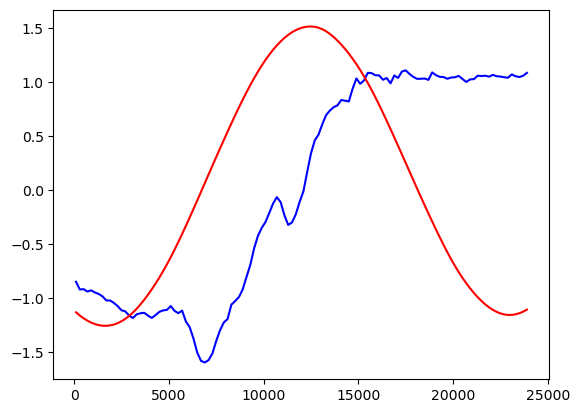

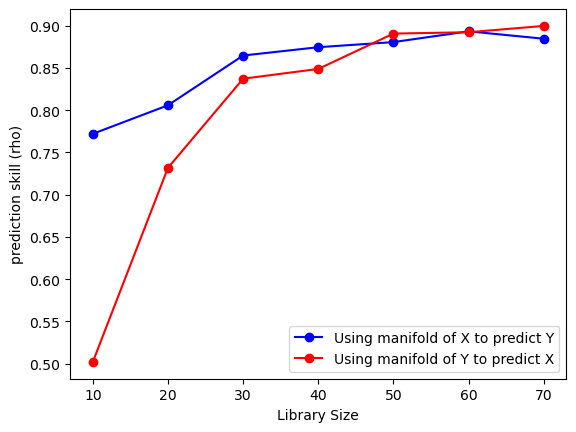

In [55]:

import pandas as pd
import numpy as np
from pyEDM import CCM
import matplotlib.pyplot as plt
from scipy.stats import zscore


# Prepare DataFrame
df = pd.DataFrame({
    'Time': ds_sat['age'].values,
    'X': np.flipud(ds_sat['sat'].isel(lat=80).isel(lon=0).values),
    'Y': np.flipud(df_pre['pre'].values*-1)
    
})




# plot df
fig, ax = plt.subplots()
plt.plot(df['Time'], zscore(df['X']), 'b-')
plt.plot(df['Time'], zscore(df['Y']), 'r-')



# CCM call
ccm_out = CCM(
    dataFrame   = df,
    E           = 4,
    tau         = 3,
    columns     = "X",   # predictor
    target      = "Y",   # target
    libSizes    = "10 20 30 40 50 60 70",
    sample      = 10,
    random      = True,
    replacement = False,
    Tp          = 0
)

print(ccm_out)
print("Columns:", ccm_out.columns)

fig, ax = plt.subplots()
# plot the results
plt.plot(ccm_out['LibSize'], ccm_out['X:Y'], 'bo-', label='Using manifold of X to predict Y')
plt.plot(ccm_out['LibSize'], ccm_out['Y:X'], 'ro-', label='Using manifold of Y to predict X')
plt.xlabel("Library Size")
plt.ylabel('prediction skill (rho)')
plt.legend()
plt.show()

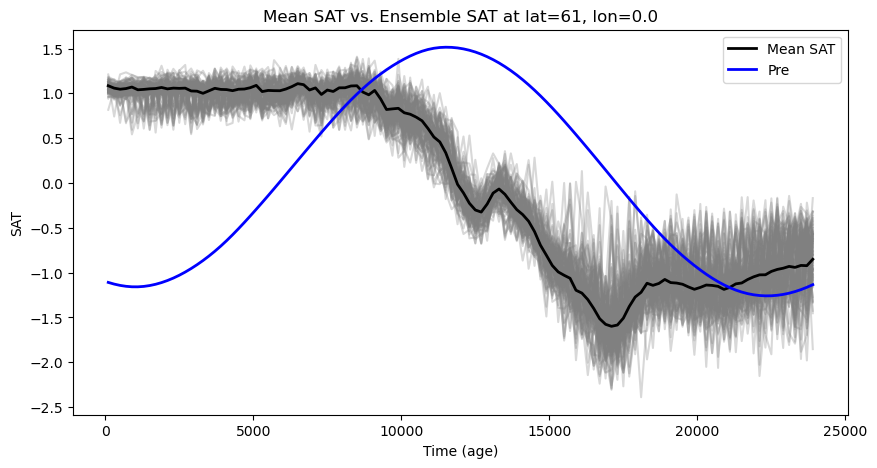

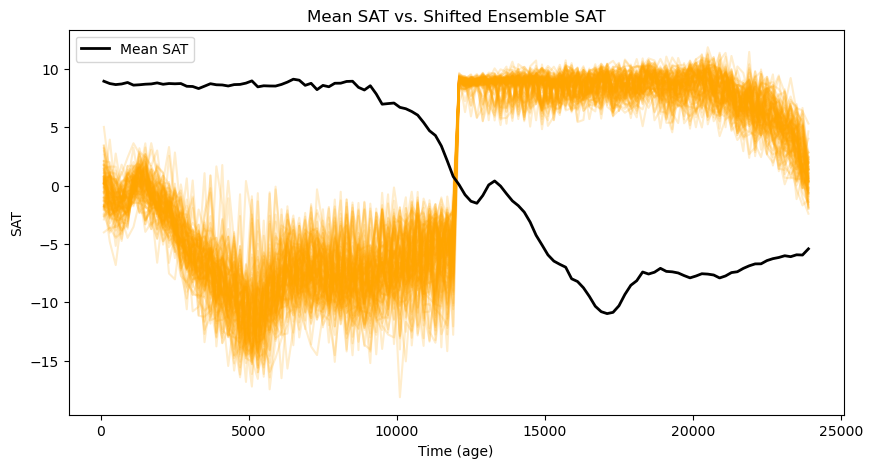

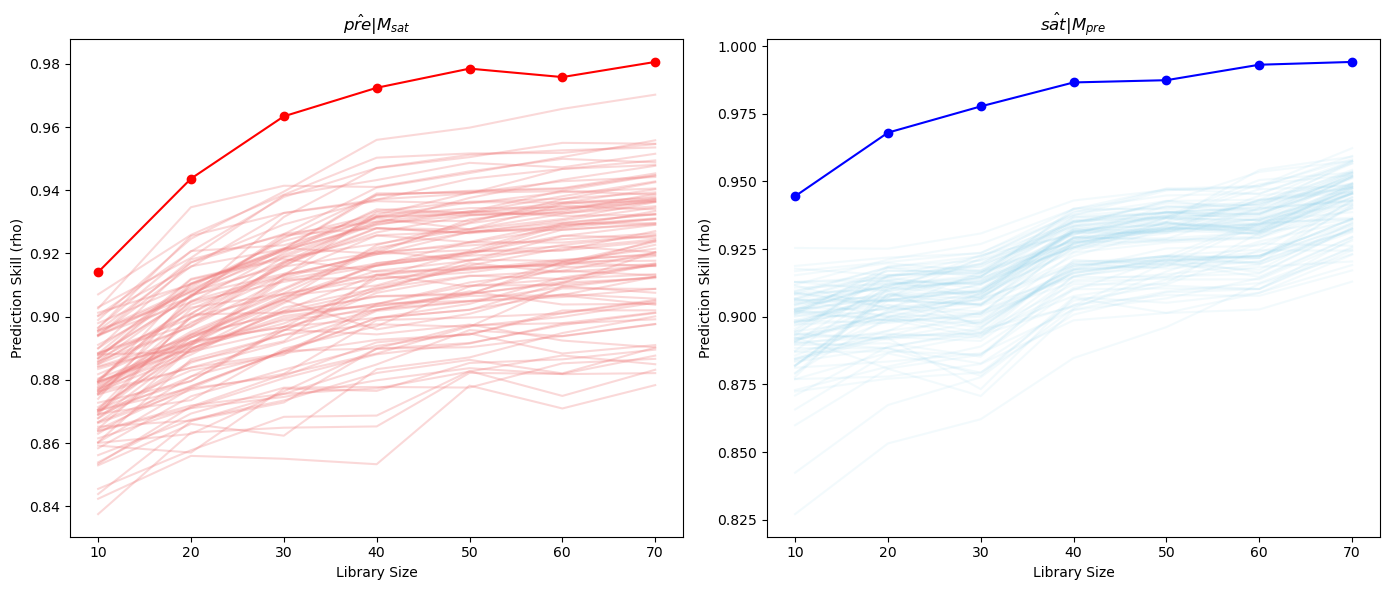

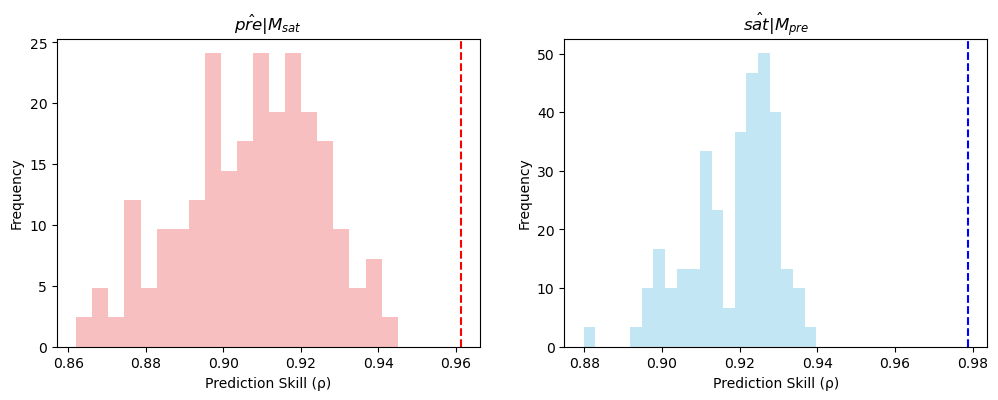

False


In [59]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)

results = st.ccm_significance_statistic(
    ds_sat= xr.open_dataset('LGMR_data/LGMR_SAT_climo.nc'),
    df_pre= pd.read_csv(r"D:\VScode\Inso_LGMR\inso_data\pre.csv"),
    ds_sat_ens= xr.open_dataset('LGMR_data/LGMR_SAT_ens.nc'),
    lat_idx=80,
    lon_idx=0,
    samples=100,
    E_val=4,
    tau_val=3,
    Tp_val=-20,
    libSizes="10 20 30 40 50 60 70",
    show_figures=True
)

ccm_out = results["ccm_mean"]
ensemble_ccm = results["ensemble_ccm"]

test_result = st.ccm_significance_test(ccm_out, ensemble_ccm, if_plot=True)
print(test_result)
